<a href="https://colab.research.google.com/github/entc-17-fyp-20/WPF_Data_Visualization/blob/Kusal/RNN_GRU_for_active_wind_power.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **One step univariate model**

In [1]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from collections import UserDict
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image
%matplotlib inline
import plotly.express as px
import io


pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

url1 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/S6%2010%20seconed%20data.csv' #S6 10 seconed data.csv
url2 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_1.csv' #AE59_1
url3 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_2.csv' #AE59_2
url4 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20June%2010%20sec%20data.csv' #V08 June 10 sec data.csv; does not contain current columns
url5 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20June%2010%20sec%20data.csv' #V13 June 10 sec data.csv
url6 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20July%2010%20sec%20data.csv' #V08 July 10 sec data.csv
url7 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20July%2010%20sec%20data.csv' #V13 July 10 sec data.csv
url8 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar.csv'  #Mannar dataset-10_min-wind_speed.csv
url9 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar%20full%20data.csv' #Mannar full data set.csv
df = pd.read_csv(url9)

In [2]:
df=pd.DataFrame(df)
#df.rename(columns = {'Average Wind Speed (m/s)':'avg_wind_speed'}, inplace = True)
df

,Date & Time,Average Wind Speed (m/s),Average Wind Dirction (deg),Average Active Power (MW),Forecasted Power (kW)
0,8/1/2021 0:00,10.66,186.92,95.84,100.25
1,8/1/2021 0:10,10.71,188.15,96.03,100.01
2,8/1/2021 0:20,10.53,188.78,93.72,97.12
3,8/1/2021 0:30,10.20,189.80,88.84,96.96
4,8/1/2021 0:40,10.34,193.00,90.97,94.08
...,...,...,...,...,...
4404,8/31/2021 23:20,11.62,195.08,100.45,101.74
4405,8/31/2021 23:30,11.16,196.36,98.01,101.78
4406,8/31/2021 23:40,10.66,198.02,93.11,101.85
4407,8/31/2021 23:50,10.90,196.96,93.68,101.29


In [3]:
df=df.set_index('Date & Time')
df

,Average Wind Speed (m/s),Average Wind Dirction (deg),Average Active Power (MW),Forecasted Power (kW)
Date & Time,,,,
8/1/2021 0:00,10.66,186.92,95.84,100.25
8/1/2021 0:10,10.71,188.15,96.03,100.01
8/1/2021 0:20,10.53,188.78,93.72,97.12
8/1/2021 0:30,10.20,189.80,88.84,96.96
8/1/2021 0:40,10.34,193.00,90.97,94.08
...,...,...,...,...
8/31/2021 23:20,11.62,195.08,100.45,101.74
8/31/2021 23:30,11.16,196.36,98.01,101.78
8/31/2021 23:40,10.66,198.02,93.11,101.85


Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [4]:
df.describe()

,Average Wind Speed (m/s),Average Wind Dirction (deg),Average Active Power (MW),Forecasted Power (kW)
count,"4,409.00","4,409.00","4,409.00","4,409.00"
mean,9.95,197.37,72.60,72.22
std,2.59,14.21,31.06,29.21
min,1.81,130.84,-0.76,1.83
25%,8.22,189.00,48.45,45.45
50%,10.06,194.74,84.46,79.70
75%,11.88,203.61,100.99,100.57
max,16.45,311.14,103.42,103.39


In [5]:
fig = px.line(df,x=df.index, y=' Average Active Power (MW) ') 
fig.show()

# **Train, validation and test sets**

In [6]:
L=len(df)
valid_start=int(18*L/20)
test_start=int(19*L/20)

train,valid,test=df[:valid_start],df[valid_start:test_start],df[test_start:L]  #seperate train and test data arrays
print(train.shape)
print(valid.shape)
print(test.shape)

print(train.describe())
print(valid.describe())
print(test.describe())

(3968, 4)
(220, 4)
(221, 4)
       Average  Wind Speed (m/s)  ...   Forecasted Power (kW) 
count                   3,968.00  ...                 3,968.00
mean                        9.88  ...                    70.69
std                         2.65  ...                    29.82
min                         1.81  ...                     1.83
25%                         8.07  ...                    43.72
50%                        10.00  ...                    76.94
75%                        11.88  ...                   100.31
max                        15.88  ...                   103.39

[8 rows x 4 columns]
       Average  Wind Speed (m/s)  ...   Forecasted Power (kW) 
count                     220.00  ...                   220.00
mean                       11.35  ...                    93.61
std                         1.90  ...                    15.18
min                         6.47  ...                    42.51
25%                        10.64  ...                    95.51
50%  

In [7]:
fig1 = px.line(df,x=df.index, y='Average  Wind Speed (m/s)') 
fig1.show()

fig2 = px.line(df,x=df.index, y=" Average Active Power (MW) ") 
fig2.show()

In [8]:
print(train)

                 Average  Wind Speed (m/s)  ...   Forecasted Power (kW) 
Date & Time                                 ...                         
8/1/2021 0:00                        10.66  ...                   100.25
8/1/2021 0:10                        10.71  ...                   100.01
8/1/2021 0:20                        10.53  ...                    97.12
8/1/2021 0:30                        10.20  ...                    96.96
8/1/2021 0:40                        10.34  ...                    94.08
...                                    ...  ...                      ...
8/28/2021 21:50                      14.26  ...                   102.92
8/28/2021 22:00                      14.00  ...                   102.92
8/28/2021 22:10                      13.36  ...                   102.94
8/28/2021 22:20                      12.71  ...                   102.74
8/28/2021 22:30                      12.51  ...                   102.78

[3968 rows x 4 columns]


# **Data preparation**

In [9]:
T = 6
HORIZON = 1

**Data preparation - Training data**

In [10]:
scaler = MinMaxScaler()
train=pd.DataFrame(train[' Average Active Power (MW) '])
train[' Average Active Power (MW) '] = scaler.fit_transform(train)

train_shifted = train.copy()
train_shifted['y_t+1'] = train_shifted[' Average Active Power (MW) '].shift(-1)
train_shifted.head(10)

,Average Active Power (MW),y_t+1
Date & Time,,
8/1/2021 0:00,0.93,0.93
8/1/2021 0:10,0.93,0.91
8/1/2021 0:20,0.91,0.86
8/1/2021 0:30,0.86,0.88
8/1/2021 0:40,0.88,0.90
8/1/2021 0:50,0.90,0.91
8/1/2021 1:00,0.91,0.94
8/1/2021 1:10,0.94,0.94
8/1/2021 1:20,0.94,0.92


In [11]:
'''for t in range(1, T+1):
    train_shifted[str(T-t)] = train_shifted['Average Wind Speed (m/s)'].shift(T-t, freq='H')
y_col = 'y_t+1'
X_cols = ['wind_speed_t-5',
             'wind_speed_t-4',
             'wind_speed_t-3',
             'wind_speed_t-2',
             'wind_speed_t-1',
             'wind_speed_t']
train_shifted.columns = ['original_wind_speed']+[y_col]+X_cols'''
for t in range(1, T+1):
    train_shifted['active_power_t-'+str(T-t)] = train_shifted[' Average Active Power (MW) '].shift(T-t)
train_shifted = train_shifted.rename(columns={' Average Active Power (MW) ':'Original_active_power'})
train_shifted
# 4.Discard any samples with missing values
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(10)

,Original_active_power,y_t+1,active_power_t-5,active_power_t-4,active_power_t-3,active_power_t-2,active_power_t-1,active_power_t-0
Date & Time,,,,,,,,
8/1/2021 0:50,0.90,0.91,0.93,0.93,0.91,0.86,0.88,0.90
8/1/2021 1:00,0.91,0.94,0.93,0.91,0.86,0.88,0.90,0.91
8/1/2021 1:10,0.94,0.94,0.91,0.86,0.88,0.90,0.91,0.94
8/1/2021 1:20,0.94,0.92,0.86,0.88,0.90,0.91,0.94,0.94
8/1/2021 1:30,0.92,0.93,0.88,0.90,0.91,0.94,0.94,0.92
8/1/2021 1:40,0.93,0.94,0.90,0.91,0.94,0.94,0.92,0.93
8/1/2021 1:50,0.94,0.95,0.91,0.94,0.94,0.92,0.93,0.94
8/1/2021 2:00,0.95,0.97,0.94,0.94,0.92,0.93,0.94,0.95
8/1/2021 2:10,0.97,0.97,0.94,0.92,0.93,0.94,0.95,0.97


In [12]:
y_train = np.array(train_shifted["y_t+1"])
X_train=np.array(train_shifted[['active_power_t-'+str(T-t) for t in range(1, T+1)]])

In [13]:
# This is an important step to reshape the X into 3 dimension array
X_train = X_train.reshape(X_train.shape[0], T, 1)

In [14]:
y_train.shape

(3962,)

In [15]:
y_train[:3]

array([0.91, 0.94, 0.94])

In [16]:
X_train.shape

(3962, 6, 1)

In [17]:
X_train[:3]

array([[[0.93],
        [0.93],
        [0.91],
        [0.86],
        [0.88],
        [0.9 ]],

       [[0.93],
        [0.91],
        [0.86],
        [0.88],
        [0.9 ],
        [0.91]],

       [[0.91],
        [0.86],
        [0.88],
        [0.9 ],
        [0.91],
        [0.94]]])

In [18]:
train_shifted.head(3)

,Original_active_power,y_t+1,active_power_t-5,active_power_t-4,active_power_t-3,active_power_t-2,active_power_t-1,active_power_t-0
Date & Time,,,,,,,,
8/1/2021 0:50,0.90,0.91,0.93,0.93,0.91,0.86,0.88,0.90
8/1/2021 1:00,0.91,0.94,0.93,0.91,0.86,0.88,0.90,0.91
8/1/2021 1:10,0.94,0.94,0.91,0.86,0.88,0.90,0.91,0.94


**Data preparation - Validation data**

In [19]:
valid=pd.DataFrame(valid[' Average Active Power (MW) '])
valid

,Average Active Power (MW)
Date & Time,
8/28/2021 22:40,101.58
8/28/2021 22:50,101.70
8/28/2021 23:00,101.59
8/28/2021 23:10,101.45
8/28/2021 23:20,101.33
...,...
8/30/2021 10:30,49.74
8/30/2021 10:40,49.20
8/30/2021 10:50,45.19


In [20]:
valid_new=df[valid_start-T+1:test_start]
valid_new=pd.DataFrame(valid_new[' Average Active Power (MW) '])
valid_new.head(20)

,Average Active Power (MW)
Date & Time,
8/28/2021 21:50,102.77
8/28/2021 22:00,102.55
8/28/2021 22:10,102.22
8/28/2021 22:20,101.85
8/28/2021 22:30,101.72
8/28/2021 22:40,101.58
8/28/2021 22:50,101.70
8/28/2021 23:00,101.59
8/28/2021 23:10,101.45


In [21]:
valid_new[' Average Active Power (MW) ']=scaler.transform(valid_new)
valid_new.head()

,Average Active Power (MW)
Date & Time,
8/28/2021 21:50,0.99
8/28/2021 22:00,0.99
8/28/2021 22:10,0.99
8/28/2021 22:20,0.99
8/28/2021 22:30,0.98


In [22]:
valid_shifted = valid_new.copy() 
valid_shifted['y_t+1'] = valid_shifted[' Average Active Power (MW) '].shift(-1)
valid_shifted.head(10)

for t in range(1, T+1):
    valid_shifted['active_power_t-'+str(T-t)] = valid_shifted[' Average Active Power (MW) '].shift(T-t)
vali_shifted = valid_shifted.rename(columns={' Average Active Power (MW) ':'Original_active_power'})

valid_shifted = valid_shifted.dropna(how='any')
print(valid_shifted)
y_valid = np.array(valid_shifted["y_t+1"])
X_valid=np.array(valid_shifted[['active_power_t-'+str(T-t) for t in range(1, T+1)]])
X_valid = X_valid.reshape(X_valid.shape[0], T, 1)

                  Average Active Power (MW)   ...  active_power_t-0
Date & Time                                   ...                  
8/28/2021 22:40                         0.98  ...              0.98
8/28/2021 22:50                         0.98  ...              0.98
8/28/2021 23:00                         0.98  ...              0.98
8/28/2021 23:10                         0.98  ...              0.98
8/28/2021 23:20                         0.98  ...              0.98
...                                      ...  ...               ...
8/30/2021 10:20                         0.52  ...              0.52
8/30/2021 10:30                         0.49  ...              0.49
8/30/2021 10:40                         0.48  ...              0.48
8/30/2021 10:50                         0.44  ...              0.44
8/30/2021 11:00                         0.47  ...              0.47

[219 rows x 8 columns]


In [23]:
y_valid.shape

(219,)

In [24]:
y_valid[:3]

array([0.98, 0.98, 0.98])

In [25]:
X_valid.shape

(219, 6, 1)

In [26]:
X_valid[:3]

array([[[0.99],
        [0.99],
        [0.99],
        [0.99],
        [0.98],
        [0.98]],

       [[0.99],
        [0.99],
        [0.99],
        [0.98],
        [0.98],
        [0.98]],

       [[0.99],
        [0.99],
        [0.98],
        [0.98],
        [0.98],
        [0.98]]])

# **Implement the RNN**

In [27]:
from keras.models import Model, Sequential
from keras.layers import GRU, Dense
from keras.callbacks import EarlyStopping

In [28]:
LATENT_DIM = 5 # number of units in the RNN layer
BATCH_SIZE = 32 # number of samples per mini-batch
EPOCHS = 10 # maximum number of times the training algorithm will cycle through all samples

In [29]:
model = Sequential()
model.add(GRU(LATENT_DIM, input_shape=(T, 1)))
model.add(Dense(HORIZON))


Use mean squared error as the loss function. The Keras documentation recommends the optimizer RMSprop for RNNs.

In [30]:
model.compile(optimizer='RMSprop', loss='mse')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 5)                 120       
                                                                 
 dense (Dense)               (None, 1)                 6         
                                                                 
Total params: 126
Trainable params: 126
Non-trainable params: 0
_________________________________________________________________


In [32]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [33]:
history = model.fit(X_train,
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_valid, y_valid),
                    callbacks=[earlystop],
                    verbose=1)

Epoch 1/10
124/124 [==============================] - 4s 13ms/step - loss: 0.2668 - val_loss: 0.0305
Epoch 2/10
124/124 [==============================] - 1s 9ms/step - loss: 0.0175 - val_loss: 0.0035
Epoch 3/10
124/124 [==============================] - 1s 9ms/step - loss: 0.0025 - val_loss: 0.0025
Epoch 4/10
124/124 [==============================] - 1s 9ms/step - loss: 0.0021 - val_loss: 0.0023
Epoch 5/10
124/124 [==============================] - 1s 9ms/step - loss: 0.0019 - val_loss: 0.0021
Epoch 6/10
124/124 [==============================] - 1s 9ms/step - loss: 0.0017 - val_loss: 0.0019
Epoch 7/10
124/124 [==============================] - 1s 9ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 8/10
124/124 [==============================] - 1s 10ms/step - loss: 0.0015 - val_loss: 0.0017
Epoch 9/10
124/124 [==============================] - 1s 10ms/step - loss: 0.0014 - val_loss: 0.0018
Epoch 10/10
124/124 [==============================] - 1s 8ms/step - loss: 0.0014 - val_loss: 0.0

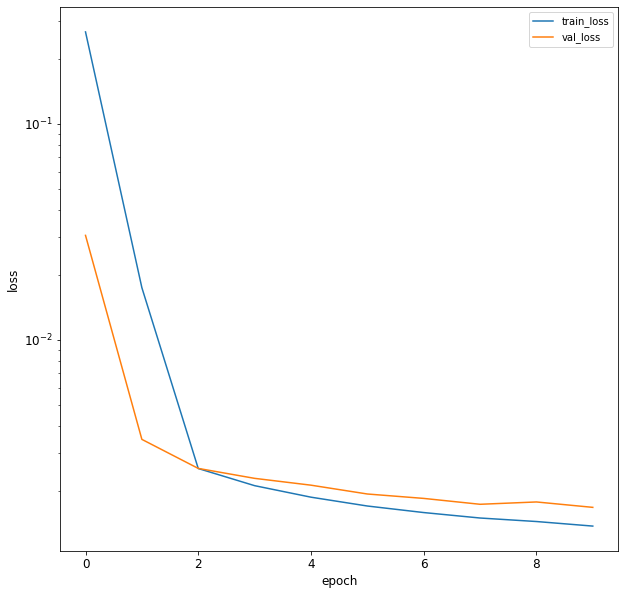

In [34]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

# **Evaluate the model**

In [35]:
test_forecasted=pd.DataFrame(test[' Forecasted Power (kW) '])
test=pd.DataFrame(test[' Average Active Power (MW) '])
test_new=df[test_start-T+1:L]
test_new=pd.DataFrame(test_new[' Average Active Power (MW) '])

test_new[' Average Active Power (MW) ']=scaler.transform(test_new)

test_shifted = test_new.copy()
test_shifted['y_t+1'] = test_shifted[' Average Active Power (MW) '].shift(-1)
print(test_shifted)

for t in range(1, T+1):
    test_shifted['active_power_t-'+str(T-t)] = test_shifted[' Average Active Power (MW) '].shift(T-t)
test_shifted = test_shifted.rename(columns={' Average Active Power (MW) ':'Original_active_power'})

test_shifted = test_shifted.dropna(how='any')
y_test = np.array(test_shifted['Original_active_power'])
X_test=np.array(test_shifted[['active_power_t-'+str(T-t) for t in range(1, T+1)]])
X_test = X_test.reshape(X_test.shape[0], T, 1)

                  Average Active Power (MW)   y_t+1
Date & Time                                        
8/30/2021 10:30                         0.49   0.48
8/30/2021 10:40                         0.48   0.44
8/30/2021 10:50                         0.44   0.47
8/30/2021 11:00                         0.47   0.46
8/30/2021 11:10                         0.46   0.54
...                                      ...    ...
8/31/2021 23:20                         0.97   0.95
8/31/2021 23:30                         0.95   0.90
8/31/2021 23:40                         0.90   0.91
8/31/2021 23:50                         0.91   0.91
1/9/2021                                0.91    nan

[226 rows x 2 columns]


In [36]:
y_test.shape

(220,)

In [37]:
X_test.shape

(220, 6, 1)

**Make predictions on test set**

In [38]:
predictions = model.predict(X_test)
predictions

array([[0.54],
       [0.56],
       [0.57],
       [0.57],
       [0.56],
       [0.59],
       [0.63],
       [0.58],
       [0.55],
       [0.5 ],
       [0.46],
       [0.43],
       [0.42],
       [0.52],
       [0.59],
       [0.66],
       [0.8 ],
       [0.91],
       [0.89],
       [0.87],
       [0.86],
       [0.79],
       [0.71],
       [0.68],
       [0.65],
       [0.68],
       [0.76],
       [0.79],
       [0.82],
       [0.84],
       [0.79],
       [0.74],
       [0.8 ],
       [0.92],
       [0.95],
       [0.95],
       [0.96],
       [0.95],
       [0.93],
       [0.95],
       [0.97],
       [0.95],
       [0.92],
       [0.9 ],
       [0.86],
       [0.87],
       [0.93],
       [0.96],
       [0.97],
       [0.96],
       [0.94],
       [0.94],
       [0.92],
       [0.91],
       [0.9 ],
       [0.89],
       [0.88],
       [0.86],
       [0.83],
       [0.78],
       [0.71],
       [0.57],
       [0.54],
       [0.55],
       [0.55],
       [0.52],
       [0.

In [39]:
predictions=pd.DataFrame(predictions)
predictions

,0
0,0.54
1,0.56
2,0.57
3,0.57
4,0.56
...,...
215,0.99
216,0.98
217,0.96
218,0.92


In [40]:
forecasted_values=np.array(test_forecasted[' Forecasted Power (kW) '])
forecasted_values=pd.DataFrame(forecasted_values)
forecasted_values

,0
0,56.01
1,57.30
2,61.88
3,63.02
4,63.60
...,...
216,101.74
217,101.78
218,101.85
219,101.29


In [41]:
eval_df = pd.DataFrame(predictions, columns=['t+'+str(t) for t in range(1, HORIZON+1)])
eval_df['timestamp'] = test_shifted.index
eval_df = pd.melt(eval_df, id_vars='timestamp', value_name='prediction', var_name='h')
eval_df['actual'] = np.transpose(y_test).ravel()
eval_df['prediction'] =predictions 
eval_df['forecasted_values']=forecasted_values
eval_df

,timestamp,h,prediction,actual,forecasted_values
0,8/30/2021 11:20,t+1,0.54,0.54,56.01
1,8/30/2021 11:30,t+1,0.56,0.55,57.30
2,8/30/2021 11:40,t+1,0.57,0.56,61.88
3,8/30/2021 11:50,t+1,0.57,0.56,63.02
4,8/30/2021 12:00,t+1,0.56,0.54,63.60
...,...,...,...,...,...
215,8/31/2021 23:10,t+1,0.99,0.98,101.67
216,8/31/2021 23:20,t+1,0.98,0.97,101.74
217,8/31/2021 23:30,t+1,0.96,0.95,101.78
218,8/31/2021 23:40,t+1,0.92,0.90,101.85


In [42]:
eval_df[['prediction']]=scaler.inverse_transform(np.array(eval_df[['prediction']]))
eval_df[['actual']]=scaler.inverse_transform(np.array(eval_df[['actual']]))
eval_df[['Our_prediction_diff']]=np.abs(eval_df['prediction']-eval_df['actual'])
eval_df[['CEB_prediction_diff']]=np.abs(eval_df['forecasted_values']-eval_df['actual'])
eval_df['our_rs_eror']=np.sqrt(np.abs(eval_df['prediction']-eval_df['actual']))
eval_df['rs_error']=np.sqrt(np.abs(eval_df['forecasted_values']-eval_df['actual']))
#eval_df[['prediction']].shape
eval_df

,timestamp,h,prediction,actual,forecasted_values,Our_prediction_diff,CEB_prediction_diff,our_rs_eror,rs_error
0,8/30/2021 11:20,t+1,55.13,55.50,56.01,0.37,0.51,0.61,0.71
1,8/30/2021 11:30,t+1,57.74,56.08,57.30,1.66,1.22,1.29,1.10
2,8/30/2021 11:40,t+1,58.39,57.41,61.88,0.98,4.47,0.99,2.11
3,8/30/2021 11:50,t+1,59.03,57.97,63.02,1.06,5.05,1.03,2.25
4,8/30/2021 12:00,t+1,57.06,55.53,63.60,1.53,8.07,1.24,2.84
...,...,...,...,...,...,...,...,...,...
215,8/31/2021 23:10,t+1,101.88,101.18,101.67,0.70,0.49,0.84,0.70
216,8/31/2021 23:20,t+1,101.25,100.45,101.74,0.80,1.29,0.90,1.14
217,8/31/2021 23:30,t+1,99.13,98.01,101.78,1.12,3.77,1.06,1.94
218,8/31/2021 23:40,t+1,94.64,93.11,101.85,1.53,8.74,1.24,2.96


**Compute the mean absolute percentage error(MAPE) over all predictions**

In [43]:
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

actual = eval_df['actual']
pred = eval_df['prediction']

mape(actual, pred)

1.452913876678815

In [44]:
def rmse(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    x=np.mean((actual - pred)**2)
    return np.sqrt(x)

actual = eval_df['actual']
pred = eval_df['prediction']

rmse(actual, pred)

1.128866685937686

**MAPE of CEB preictions**

In [45]:
def mape(actual, forecasted): 
    actual, pred = np.array(actual), np.array(forecasted)
    return np.mean(np.abs((actual - forecasted) / actual)) * 100

actual = eval_df['actual']
forecasted = eval_df['forecasted_values']

mape(actual, forecasted)


10.918870806377468

In [46]:
def rmse(actual, forecasted): 
    actual, pred = np.array(actual), np.array(forecasted)
    x=np.mean((actual - forecasted)**2)
    return np.sqrt(x)

actual = eval_df['actual']
forecasted = eval_df['forecasted_values']

rmse(actual, forecasted)

9.03929359166764

**Plot the predictions vs the actuals for the test data**

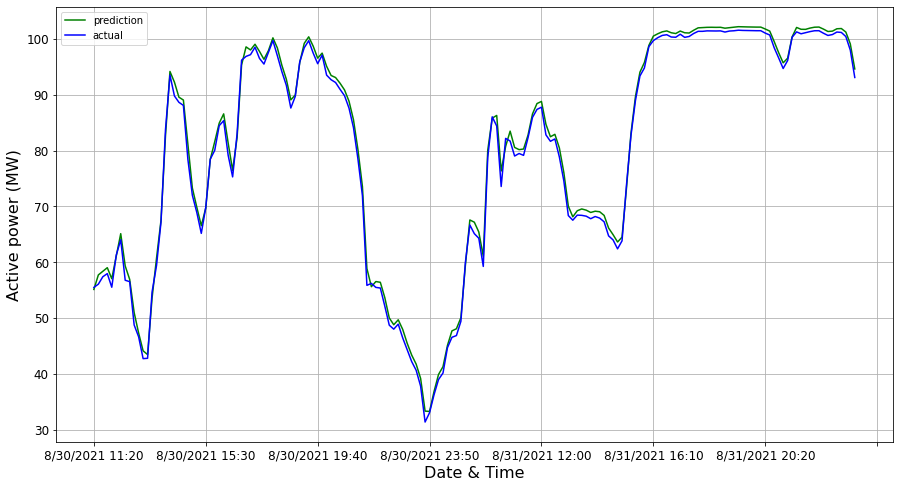

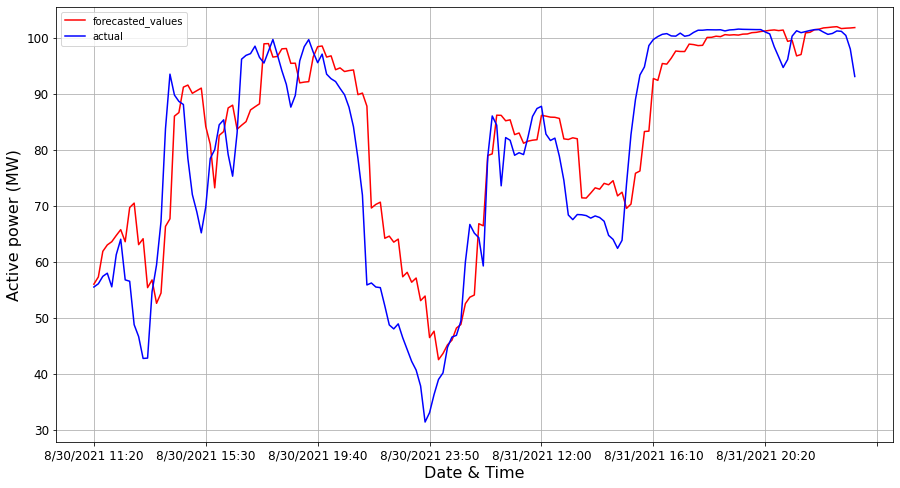

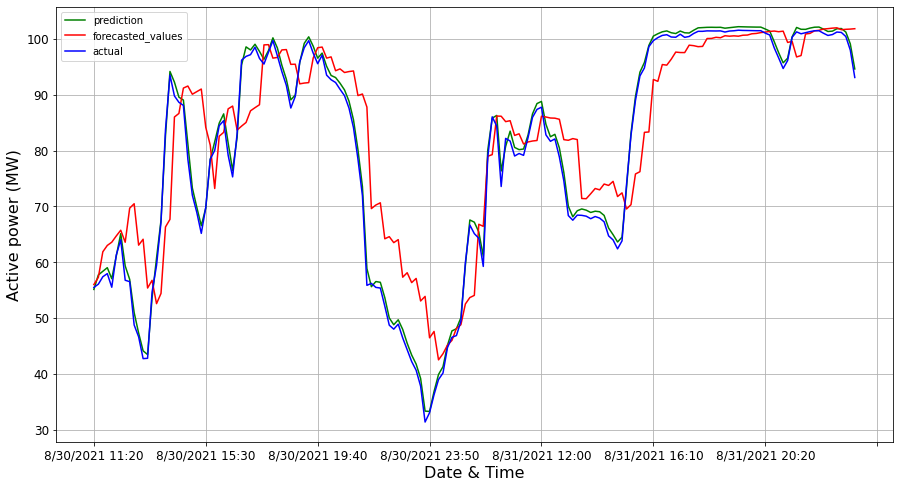

In [48]:
eval_df[eval_df.timestamp<'8/31/2021 23:50'].plot(x='timestamp', y=['prediction','actual'], style=['g','b'],fontsize=12, figsize=(15, 8))
plt.xlabel('Date & Time', fontsize=16)
plt.ylabel('Active power (MW)', fontsize=16)
plt.grid()
plt.show()

eval_df[eval_df.timestamp<'8/31/2021 23:50'].plot(x='timestamp', y=['forecasted_values', 'actual'], style=['r', 'b'],fontsize=12, figsize=(15, 8))
plt.xlabel('Date & Time', fontsize=16)
plt.ylabel('Active power (MW)', fontsize=16)
plt.grid()
plt.show()

eval_df[eval_df.timestamp<'8/31/2021 23:50'].plot(x='timestamp', y=['prediction','forecasted_values', 'actual'], style=['g','r', 'b'],fontsize=12, figsize=(15, 8))
plt.xlabel('Date & Time', fontsize=16)
plt.ylabel('Active power (MW)', fontsize=16)
plt.grid()
plt.show()
